# Στοιχεία ομάδας

Ομάδα:Α18
Ονοματεπώνυμα: Καρακάσης Χρυσόστομος(03113136), Γουρουνάς Δημήτρης(03113060)

# Περιγραφή του dataset

Το dataset αυτό περιλαμβάνει βιοϊατρικές μετρήσεις ήχου που έγιναν σε 31 άτομα, με σκοπό να συμπεράνουμε εάν κάποιος πάσχει ή πρόκειται να πάσχει από τη νόσο Parkinson. Κάθε στήλη του πίνακα δεδομένων είναι μια μέτρηση ,με εξαίρεση τη στήλη με τίτλο status που παίρνει τιμές 0 ή 1. Κάθε γραμμή αντιστοιχεί σε ένα από τα 195 σε σύνολο δείγματα που ελήφθησαν. Οι κατηγορίες προφανώς είναι 2 (0 ή 1) ανάλογα με το αν έχει ή δεν έχει τη νόσο. Συνολικά έγιναν περίπου 6 μετρήσεις ανά ασθενή, το όνομα του οποίου βρίσκεται στην πρώτη στήλη. Τα χαρακτηριστικά είναι πραγματικοί αριθμοί σε ASCII CSV format. 
Για την επεξεργασία των δεδομένων και εκπαίδευση του συστήματος αφαιρέσαμε τις στήλες με τα ονόματα των ασθενών και το status. Η στήλη status είναι τα labels που χρειαζόμαστε για την εκπαίδευση.
Δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά ,ούτε απουσιάζουσες τιμές

In [1]:
!pip install --upgrade sklearn
!pip install --upgrade pandas
!pip install  scikit-learn #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install --upgrade imblearn
!pip install --upgrade imbalanced-learn

Requirement already up-to-date: sklearn in /home/nbcommon/anaconda2_501/lib/python2.7/site-packages
    100% |################################| 12.2MB 92kB/s  eta 0:00:01
  Found existing installation: scikit-learn 0.18.1
    DEPRECATION: Uninstalling a distutils installed project (scikit-learn) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling scikit-learn-0.18.1:
      Successfully uninstalled scikit-learn-0.18.1
    100% |################################| 24.3MB 47kB/s  eta 0:00:01
    100% |################################| 512kB 2.5MB/s eta 0:00:01
Requirement already up-to-date: numpy>=1.9.0 in /home/nbcommon/anaconda2_501/lib/python2.7/site-packages (from pandas)
Requirement already up-to-date: python-dateutil in /home/nbcommon/anaconda2_501/lib/python2.7/site-packages (from pandas)
Requirement already up-to-date: six>=1.5 in /home/nbcommon/anacond

In [2]:
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import requests
import json
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from scipy import stats as st
import time
from sklearn.preprocessing import MultiLabelBinarizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

Παρακάτω ακολουθεί επεξεργασία των δεδομένων και αποθήκευση τους, όπου αποθηκεύουμε σε headers τα feature_names, αφαιρούμε από τα Data την πρώτη στήλη και τη στήλη των status, και σώζουμε τη στήλη status στο διάνυσμα στήλη DataTargets. Για την εξισορρόπηση των δεδομένων θα γίνει λόγος μετά στο κομμάτι της προεπεξεργασίας των δεδομένων.

In [3]:
import csv
f = open('parkinsons.data.txt', 'rb')
reader = csv.reader(f)
feature_names = reader.next() #prepei na to kanoume split gia na ginei pinakas...
#print headers
Data = pd.read_csv('parkinsons.data.txt').values
#print Data.shape
#print Data
Data1=Data[:,1:]
Data2=np.delete(Data1,16,axis=1) #Data2 einai ta telika pure data
DataTargets=Data.T[17,]
DataTargets=DataTargets.astype(np.int64)
#print Data2
print DataTargets.shape
print DataTargets
#print Data1.shape
#print Data2[0]
print "frequencies:", np.bincount(DataTargets)

(195,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]
frequencies: [ 48 147]


# Baseline classification

Παρακάτω ακολουθεί η εκπαίδευση των DummyClassifiers

In [4]:
train, test, train_labels, test_labels = train_test_split(Data2, DataTargets, test_size=0.2)
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")
model = dc_uniform.fit(train, train_labels)
preds=[0, 0, 0, 0, 0]
preds[0] = dc_uniform.predict(test)

Παρακάτω βλέπουμε για όλους τους Dummies το accuracy ταξινομημένο

In [5]:
parkinson_accuracy = {}
parkinson_accuracy['uniform (random)'] = dc_uniform.score(test, test_labels)
model = dc_constant_0.fit(train, train_labels)
preds[1] = dc_constant_0.predict(test)
parkinson_accuracy['constant 0'] = dc_constant_0.score(test, test_labels)
model = dc_constant_1.fit(train, train_labels)
preds[2] = dc_constant_1.predict(test)
parkinson_accuracy['constant 1'] = dc_constant_1.score(test, test_labels)
model = dc_most_frequent.fit(train, train_labels)
preds[3] = dc_most_frequent.predict(test)
parkinson_accuracy['most frequent label'] = dc_most_frequent.score(test, test_labels)
model = dc_stratified.fit(train, train_labels)
preds[4] = dc_stratified.predict(test)
parkinson_accuracy['stratified'] = dc_stratified.score(test, test_labels)

    
print "Classification Accuracy on Parkinsons Dataset (20% test set)\n"
for key, value in sorted(parkinson_accuracy.iteritems(), key=lambda (k,v): (-v,k)):
    print "%s: %s" % (key, value)
    

Classification Accuracy on Parkinsons Dataset (20% test set)

constant 1: 0.846153846154
most frequent label: 0.846153846154
stratified: 0.666666666667
uniform (random): 0.435897435897
constant 0: 0.153846153846


In [6]:
models = [dc_uniform ,dc_constant_0 ,dc_constant_1 ,dc_most_frequent ,dc_stratified]
model_names = ["uniform" ,"constant_0","constant_1" ,"most_frequent" ,"stratified"]

Confusion Matrix,F1-macro,F1-weighted average

In [7]:
# Compute confusion matrixes
macro=[0, 0, 0, 0, 0]
weighted=[0, 0, 0, 0, 0]
print "Status is 0 or 1"
for i in range(5):
    cnf_matrix = confusion_matrix(test_labels, preds[i])
    print "----------------------------------------------------------------------"
    print "For model:",model_names[i],"\n",cnf_matrix,"\n"
    # εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
    macro[i]=precision_recall_fscore_support(test_labels, preds[i], average='macro')
    print "Precision,recall and F1 for average=macro","\n", macro[i], "\n"
    # εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις δεν έχουν το ίδιο βάρος (average = weighted)
    weighted[i]=precision_recall_fscore_support(test_labels, preds[i], average='weighted')
    print "Precision,recall and F1 for average=weighted","\n",precision_recall_fscore_support(test_labels, preds[i], average='weighted'), "\n"

Status is 0 or 1
----------------------------------------------------------------------
For model: uniform 
[[ 4  2]
 [15 18]] 

Precision,recall and F1 for average=macro 
(0.5552631578947369, 0.60606060606060597, 0.49962264150943403, None) 

Precision,recall and F1 for average=weighted 
(0.79392712550607292, 0.5641025641025641, 0.62397677793904216, None) 

----------------------------------------------------------------------
For model: constant_0 
[[ 6  0]
 [33  0]] 

Precision,recall and F1 for average=macro 
(0.076923076923076927, 0.5, 0.13333333333333336, None) 

Precision,recall and F1 for average=weighted 
(0.023668639053254441, 0.15384615384615385, 0.041025641025641033, None) 

----------------------------------------------------------------------
For model: constant_1 
[[ 0  6]
 [ 0 33]] 

Precision,recall and F1 for average=macro 
(0.42307692307692307, 0.5, 0.45833333333333331, None) 

Precision,recall and F1 for average=weighted 
(0.71597633136094674, 0.84615384615384615, 0.

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Οι πρώτοι πίνακες που τυπώνονται μετά τον confusion_matrix είναι για average_none ,δηλαδή βλέπουμε το precision,recall,F1 και accuracy για την κάθε κλάση. Κατόπιν υπολογίζονται οι μέσοι όροι (με άθροισμα και διαίρεση με το 2) αυτών και παρουσιάζονται αμέσως παρακάτω. Τέλος, παρουσιάζεται και ο weighted_average ,ο οποίος στα περισσότερα είναι μεγαλύτερος ,επειδή το πλήθος των δειγμάτων που ανήκουν στην κλάση 1 είναι σαφώς μεγαλύτερο.

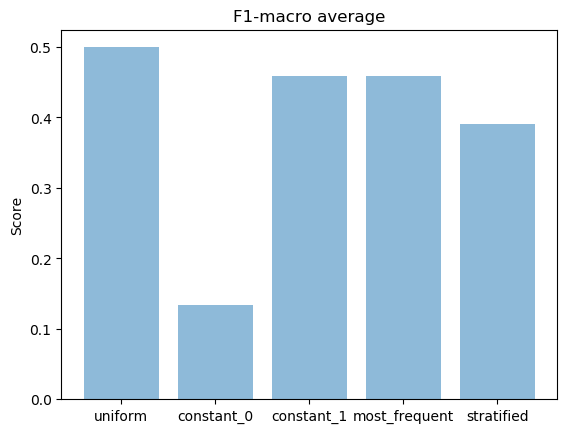

In [8]:
y_pos = np.arange(len(model_names))
performance = [macro[0][2] ,macro[1][2],macro[2][2],macro[3][2],macro[4][2]]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, model_names)
plt.ylabel('Score')
plt.title('F1-macro average')
plt.show()

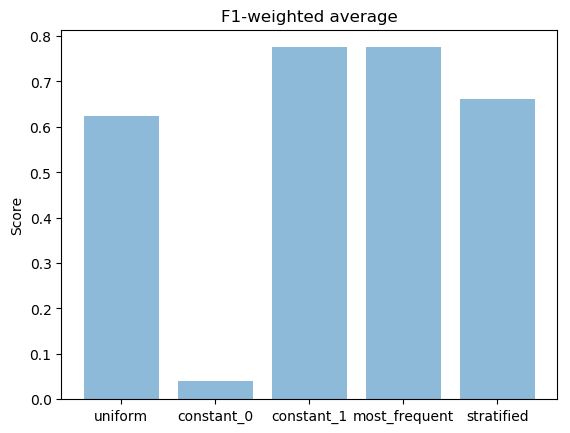

In [9]:
performance = [weighted[0][2] ,weighted[1][2],weighted[2][2],weighted[3][2],weighted[4][2]]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, model_names)
plt.ylabel('Score')
plt.title('F1-weighted average')
plt.show()

Baseline classification για MLP

In [10]:
# hidden_layer_sizes (χρησιμοποιήστε μόνο ένα επίπεδο κρυμμένων νευρώνων),
#activation, solver, max_iter, learning_rate, alpha
#κάνουμε μια αρχική εκτέλεση του MLP με default παραμέτρους
clf = MLPClassifier(solver='adam', alpha=1e-4,
                    hidden_layer_sizes=(100,) , max_iter = 200,activation = 'relu',learning_rate = 'constant',random_state=1)
clf.fit(train, train_labels)
predsmlp = clf.predict(test)
print classification_report(test_labels, predsmlp)

             precision    recall  f1-score   support

          0       0.50      0.50      0.50         6
          1       0.91      0.91      0.91        33

avg / total       0.85      0.85      0.85        39



In [11]:
print "Status is 0 or 1"
cnf_matrix = confusion_matrix(test_labels, predsmlp)
#print "----------------------------------------------------------------------"
print "For MLP:","\n",cnf_matrix,"\n"
# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macromlp=precision_recall_fscore_support(test_labels, predsmlp, average='macro')
print "Precision,recall and F1 for average=macro","\n", macromlp, "\n"
# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις δεν έχουν το ίδιο βάρος (average = weighted)
weightetmlp=precision_recall_fscore_support(test_labels, predsmlp, average='weighted')
print "Precision,recall and F1 for average=weighted","\n",precision_recall_fscore_support(test_labels, predsmlp, average='weighted'), "\n"

Status is 0 or 1
For MLP: 
[[ 3  3]
 [ 3 30]] 

Precision,recall and F1 for average=macro 
(0.70454545454545459, 0.70454545454545459, 0.70454545454545459, None) 

Precision,recall and F1 for average=weighted 
(0.84615384615384615, 0.84615384615384615, 0.84615384615384615, None) 



Παρακάτω βλέπουμε plot σύγκρισης μεταξύ του MLP και των Dummy Classifiers.

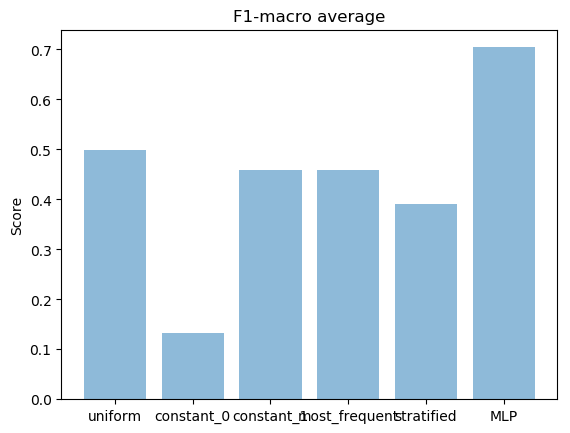

In [12]:
model_names = ["uniform" ,"constant_0","constant_1" ,"most_frequent" ,"stratified","MLP"]
y_pos = np.arange(len(model_names))
performancemacro = [macro[0][2] ,macro[1][2],macro[2][2],macro[3][2],macro[4][2],macromlp[2]]
plt.bar(y_pos, performancemacro, align='center', alpha=0.5)
plt.xticks(y_pos, model_names)
plt.ylabel('Score')
plt.title('F1-macro average')
plt.show()

Παρακάτω βλέπουμε και plot συγκρισης για το weighted

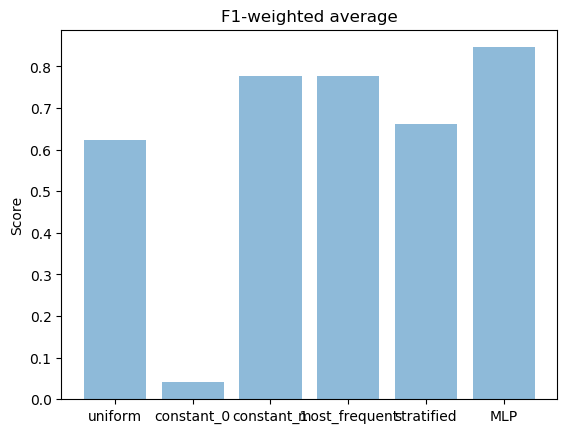

In [13]:
performanceweighted = [weighted[0][2] ,weighted[1][2],weighted[2][2],weighted[3][2],weighted[4][2],weightetmlp[2]]
plt.bar(y_pos, performanceweighted, align='center',linewidth=5, alpha=0.5)
plt.xticks(y_pos, model_names)
plt.ylabel('Score')
plt.title('F1-weighted average')
plt.show()

Έως εδώ είδαμε το baseline classification για όλους τους ταξινομητές.
Συμπεραίνουμε ότι ο MLP έχει καλύτερη απόδοση από όλους τους dummies, όπως ήταν και αναμενόμενο. Επίσης παρατηρούμε ότι ο constant_1 δίνει πολύ καλύτερα αποτελέσματα από τον constant_0 ,αφού όπως θα δούμε λίγο παρακάτω υπάρχουν πολλοί περισσότερα δείγματα που ανήκουν στην κλάση 1. Για τον ίδιο λόγο ο most_frequent έχει ακριβώς την ίδια επίδοση με τον constant_1. Επίσης παρατηρούμε ότι στο weighted average οι dummies εκτός του constant_0 έχουν καλύτερη απόδοση απότι στο macro average, γιατί η κλάση 1 εμφανίζεται πιο συχνά και συνεπώς έχει μεγαλύτερο βάρος στο μέσο όρο, οπότε καλή πρόβλεψη των 1 σε σχέση με των 0 οδηγεί σε υψηλότερο μέσο όρο.

# Βελτιστοποίηση των ταξινομητών

In [14]:
#Μείωση Διαστάσεων με VarianceThreshold()
selector = VarianceThreshold()
train_reduced = selector.fit_transform(train)
mask = selector.get_support()
test_reduced = test[:,mask]
print train.shape
print train_reduced.shape
print test.shape
print test_reduced.shape

(156, 22)
(156, 22)
(39, 22)
(39, 22)


Παρατηρούμε ότι κανένα feature δεν έχει μηδενική διακύμανση, οπότε δε μας βελτιστοποιεί τα δεδομένα το VarianceThres

In [15]:
#Κανονικοποίηση Χαρακτηριστικών
train_scaled = preprocessing.scale(train_reduced)
scaler = preprocessing.StandardScaler().fit(train_reduced)
test_scaled = scaler.transform(test_reduced)
#Εξισορρόπηση με Oversampling
print train_labels.shape
summ=train_labels.sum(axis=0)
print summ
print "Percentage of 1's=" , 100*summ/156 ,"%"

(156,)
114
Percentage of 1's= 73 %


/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Παρατηρούμε ότι το dataset χρειάζεται εξισσορόπηση.

In [16]:
ros = RandomOverSampler(random_state=0)
#tmplabels = np.asarray(mlb.inverse_transform(train_labels)).flatten()
train_resampled, trainTargets_resampled = ros.fit_sample(train_scaled,train_labels)
print train_resampled.shape
print trainTargets_resampled.shape
summ2=trainTargets_resampled.sum(axis=0)
print summ2
print "Percentage of 1's=" , 100*summ2/234 ,"%"

(228, 22)
(228,)
114
Percentage of 1's= 48 %


In [17]:
#PCA
n = 15
pca = PCA(n_components=n)
trainPCA = pca.fit_transform(train_resampled)
testPCA = pca.transform(test_scaled)
print trainPCA.shape

(228, 15)


# Dummy Classifiers στα βελτιστοποιημένα με προεπεξεργασία δεδομένα

In [18]:
model = dc_uniform.fit(trainPCA, trainTargets_resampled)
preds=[0, 0, 0, 0, 0]
preds[0] = dc_uniform.predict(testPCA)
parkinson_accuracy = {}
parkinson_accuracy['uniform (random)'] = dc_uniform.score(trainPCA, trainTargets_resampled)
model = dc_constant_0.fit(trainPCA, trainTargets_resampled)
preds[1] = dc_constant_0.predict(testPCA)
parkinson_accuracy['constant 0'] = dc_constant_0.score(trainPCA, trainTargets_resampled)
model = dc_constant_1.fit(trainPCA, trainTargets_resampled)
preds[2] = dc_constant_1.predict(testPCA)
parkinson_accuracy['constant 1'] = dc_constant_1.score(trainPCA, trainTargets_resampled)
model = dc_most_frequent.fit(trainPCA, trainTargets_resampled)
preds[3] = dc_most_frequent.predict(testPCA)
parkinson_accuracy['most frequent label'] = dc_most_frequent.score(trainPCA, trainTargets_resampled)
model = dc_stratified.fit(trainPCA, trainTargets_resampled)
preds[4] = dc_stratified.predict(testPCA)
parkinson_accuracy['stratified'] = dc_stratified.score(trainPCA, trainTargets_resampled)

    
print "Classification Accuracy on Parkinsons Dataset (20% test set)\n"
for key, value in sorted(parkinson_accuracy.iteritems(), key=lambda (k,v): (-v,k)):
    print "%s: %s" % (key, value)

Classification Accuracy on Parkinsons Dataset (20% test set)

constant 0: 0.5
constant 1: 0.5
most frequent label: 0.5
stratified: 0.495614035088
uniform (random): 0.486842105263


Σημαντική παρατήρηση τώρα που έγινε εξισορρόπηση των δεδομένων είναι ότι το accuracy των contant_0 και constant_1 έχει γίνει ίσο(όπως και το most_frequent).

In [19]:
#Compute confusion matrixes
macro_new=[0, 0, 0, 0, 0]
weighted_new=[0, 0, 0, 0, 0]
print "Status is 0 or 1"
for i in range(5):
    cnf_matrix = confusion_matrix(test_labels, preds[i])
    print "----------------------------------------------------------------------"
    print "For model:",model_names[i],"\n",cnf_matrix,"\n"
    # εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
    macro_new[i]=precision_recall_fscore_support(test_labels, preds[i], average='macro')
    print "Precision,recall and F1 for average=macro","\n", macro_new[i], "\n"
    # εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις δεν έχουν το ίδιο βάρος (average = weighted)
    weighted_new[i]=precision_recall_fscore_support(test_labels, preds[i], average='weighted')
    print "Precision,recall and F1 for average=weighted","\n",precision_recall_fscore_support(test_labels, preds[i], average='weighted'), "\n"

Status is 0 or 1
----------------------------------------------------------------------
For model: uniform 
[[ 2  4]
 [15 18]] 

Precision,recall and F1 for average=macro 
(0.46791443850267384, 0.43939393939393934, 0.4142292490118577, None) 

Precision,recall and F1 for average=weighted 
(0.71040723981900455, 0.51282051282051277, 0.58060200668896322, None) 

----------------------------------------------------------------------
For model: constant_0 
[[ 6  0]
 [33  0]] 

Precision,recall and F1 for average=macro 
(0.076923076923076927, 0.5, 0.13333333333333336, None) 

Precision,recall and F1 for average=weighted 
(0.023668639053254441, 0.15384615384615385, 0.041025641025641033, None) 

----------------------------------------------------------------------
For model: constant_1 
[[ 0  6]
 [ 0 33]] 

Precision,recall and F1 for average=macro 
(0.42307692307692307, 0.5, 0.45833333333333331, None) 

Precision,recall and F1 for average=weighted 
(0.71597633136094674, 0.84615384615384615, 0

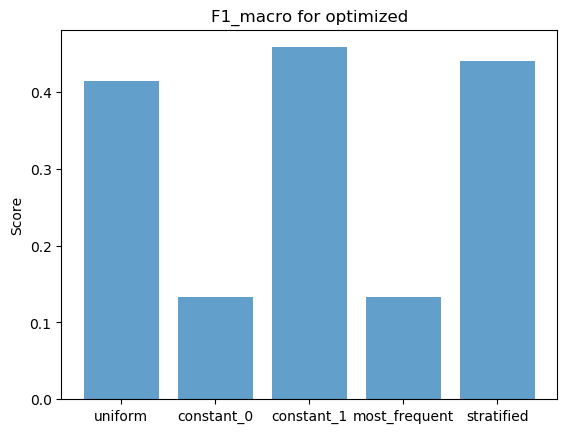

In [20]:
model_names = ["uniform" ,"constant_0","constant_1" ,"most_frequent" ,"stratified"]
y_pos = np.arange(len(model_names))
performancemacroopt = [macro_new[0][2] ,macro_new[1][2],macro_new[2][2],macro_new[3][2],macro_new[4][2]]
plt.bar(y_pos, performancemacroopt, align='center', alpha=0.7)
plt.xticks(y_pos, model_names)
plt.ylabel('Score')
plt.title('F1_macro for optimized')
plt.show()

Σύγκριση με και χωρίς προεπεξεργασία

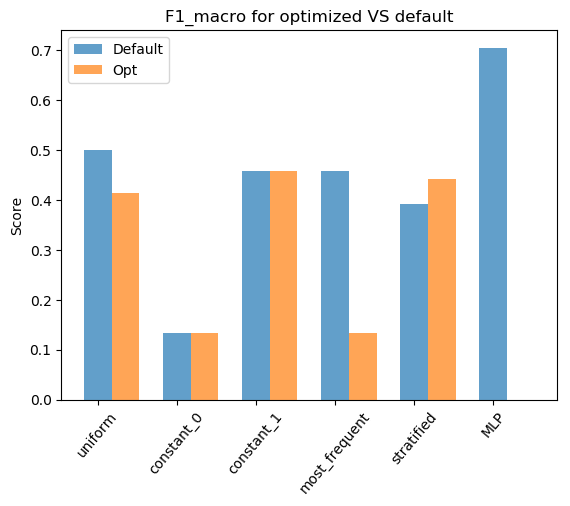

In [21]:
model_names = ["uniform" ,"constant_0","constant_1" ,"most_frequent" ,"stratified","MLP"]
y_pos = np.arange(len(model_names))
bar_width = 0.35
plt.bar(y_pos, performancemacro,bar_width, align='center', alpha=0.7,label='Default')
plt.bar(y_pos+bar_width, performancemacroopt+[0],bar_width, align='center', alpha=0.7,label='Opt')

plt.xticks(y_pos, model_names,rotation=50)
plt.ylabel('Score')
plt.title('F1_macro for optimized VS default')
plt.legend()
plt.show()

Εδώ παρατηρούμε όπως και περιμέναμε ότι η απόδοση στο constant_0 και constant_1 δε μεταβάλλεται καθόλου. Αυτό είναι λογικό, γιατί εξισορρόπηση κάναμε μόνο στα train_data, όχι στα test_data. Επομένως, αφού τα test_data έχουν περισσότερα labels ίσα με 1 παρά με 0 λογικό να έχουμε την ίδια απόδοση. Επειδή όμως τώρα το most_frequent μπορεί να προβλέπει 0 αντί για 1, βλέπουμε ότι πέφτει κατά πολύ η επίδοση του. Επειδή το uniform προβλέπει τυχαία και ομοιόμορφα, είναι και τυχαία η απόδοση του (επαναληπτικές εκτελέσεις του δίνουν τελείως διαφορετικά αποτελέσματα). 

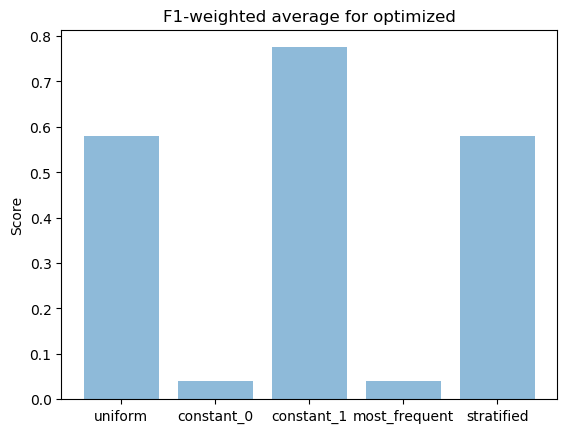

In [22]:
model_names = ["uniform" ,"constant_0","constant_1" ,"most_frequent" ,"stratified"]
y_pos = np.arange(len(model_names))
performanceweightedopt = [weighted_new[0][2] ,weighted_new[1][2],weighted_new[2][2],weighted_new[3][2],weighted_new[4][2]]
plt.bar(y_pos, performanceweightedopt, align='center', alpha=0.5)
plt.xticks(y_pos, model_names)
plt.ylabel('Score')
plt.title('F1-weighted average for optimized')
plt.show()

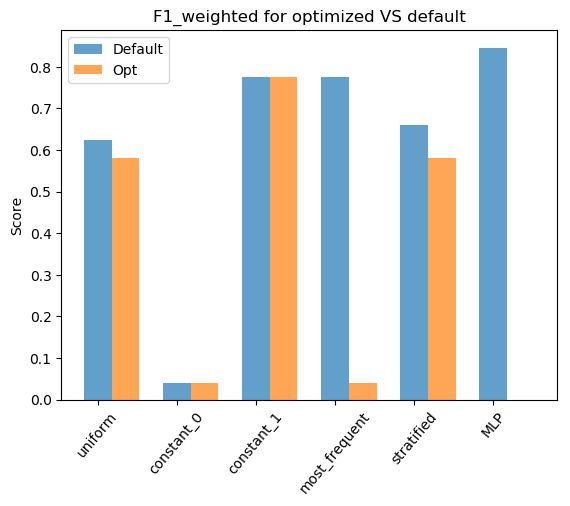

In [23]:
model_names = ["uniform" ,"constant_0","constant_1" ,"most_frequent" ,"stratified","MLP"]
y_pos = np.arange(len(model_names))
bar_width = 0.35
plt.bar(y_pos, performanceweighted,bar_width, align='center', alpha=0.7,label='Default')
plt.bar(y_pos+bar_width, performanceweightedopt+[0],bar_width, align='center', alpha=0.7,label='Opt')

plt.xticks(y_pos, model_names,rotation=50)
plt.ylabel('Score')
plt.title('F1_weighted for optimized VS default')
plt.legend()
plt.show()

Εδώ παρατηρούμε ότι το most_frequent ώς προς της weighted μετρική χειροτέρεψε σε σχέση με τη macro ,γιατί στο test_set έχουμε περισσότερα δεδομένα στην κλάση 1, και επειδή η most_frequent τώρα προβλέπει συνέχεια μηδέν (επειδή μετά το oversample 52% των δειγμάτων ανήκουν στην κλάση 0) ,τότε οι "αποτυχημένες προβλέψεις" των 1 έχουν μεγαλύτερο βάρος από ότι στη macro.
Αν στο oversample τύχαινε να έχουμε παραπάνω δεδομένα να ανήκουν στην κλάση 1, τότε το most_frequent δε θα άλλαζε σε σχέση με πριν.

Παρακάτω κάνουμε cross_validation για το MLP. Επιλέξαμε κάποια δείγματα τιμών στις παραμέτρους που είναι γύρω από τις default τιμές. Οι μεταβλητές solver,activation,learning_rate παίρνουν standard τιμές, οι οποίες είναι όσες φαίνεται παρακάτω. Όσον αφορά τις τιμές των alpha_values,hidden_layer_sizes_values πειραματιστήκαμε και λίγο παραπάνω απότι παρουσιάζουμε παρακάτω, αλλά δεν παρατηρήσαμε σημαντική διαφοροποίηση, κυρίως γιατί όπως εξηγούμε και παρακάτω, το γεγονός ότι το dataset είναι μικρό επηρεάζει την ικανότητα εκπαίδευσης του MLP classifier και διαφορετικές εκτελέσεις για το ίδιο configuration υπερπαραμέτρων δίνουν διαφορετικά αποτελέσματα.

In [265]:
solver_values= ['lbfgs', 'sgd', 'adam']
alpha_values = [0.00005, 0.0001,0.0002, 0.0003]
hidden_layer_sizes_values = [50,100, 150, 200]
max_iter_values = [100, 150, 200, 300]
activation_values = ['identity', 'logistic', 'tanh', 'relu']
learning_rate_values = ['constant', 'invscaling', 'adaptive']
max_macro=0
max_weighted=0
values_macro_max=[]
values_weighted_max=[]
final_scores_macro=[]
final_scores_weighted=[]
for solver1 in solver_values:
    for alpha1 in alpha_values:
        for hidden_layer_sizes1 in hidden_layer_sizes_values:
            for max_iter1 in max_iter_values:
                for activation1 in activation_values:
                    for learning_rate1 in learning_rate_values:
                        clf = MLPClassifier(solver=solver1, alpha=alpha1,hidden_layer_sizes=hidden_layer_sizes1, max_iter=max_iter1, activation=activation1, learning_rate=learning_rate1)
                        scores_macro = cross_val_score(clf,trainPCA, trainTargets_resampled, cv=10, scoring='f1_macro')
                        if scores_macro.mean() > max_macro:
                            max_macro=scores_macro.mean()
                            values_macro_max = [solver1 ,alpha1 ,hidden_layer_sizes1 ,max_iter1 ,activation1 ,learning_rate1]
                        scores_weighted = cross_val_score(clf,trainPCA, trainTargets_resampled, cv=10, scoring='f1_weighted')
                        if scores_weighted.mean() > max_weighted:
                            max_weighted=scores_weighted.mean()
                            values_weighted_max = [solver1 ,alpha1 ,hidden_layer_sizes1 ,max_iter1 ,activation1 ,learning_rate1]

Εκπαίδευση MLP με βέλτιστες παραμέτρους ως προς F1-macro

In [266]:
print "Optimal parameters are for macro: ",values_macro_max
clf = MLPClassifier(solver=values_macro_max[0], alpha=values_macro_max[1],hidden_layer_sizes=values_macro_max[2], max_iter=values_macro_max[3], activation=values_macro_max[4], learning_rate=values_macro_max[5])
start_time = time.time()
clf.fit(train, train_labels)
print("Fit time : %s seconds" % (time.time() - start_time))
start_time = time.time()
predsmlp_opt = clf.predict(test)
print("Train time: %s seconds" % (time.time() - start_time))
print classification_report(test_labels, predsmlp_opt)
cnf_matrix = confusion_matrix(test_labels, predsmlp_opt)
#print "----------------------------------------------------------------------"
# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macromlp_opt=precision_recall_fscore_support(test_labels, predsmlp_opt, average='macro')
print "Precision,recall and F1 for average=macro","\n", macromlp_opt, "\n"

Optimal parameters are for macro:  ['lbfgs', 0.0003, 100, 300, 'relu', 'constant']
Fit time : 0.307000160217 seconds
Train time: 0.000999927520752 seconds
             precision    recall  f1-score   support

          0       0.75      0.75      0.75         8
          1       0.94      0.94      0.94        31

avg / total       0.90      0.90      0.90        39

Precision,recall and F1 for average=macro 
(0.842741935483871, 0.842741935483871, 0.842741935483871, None) 



Για να μην ξανατρέχουμε το χρονοβόρο κομμάτι του κώδικα μας,δηλαδή τα εμφωλευμένα for,κρατάμε τις βέλτιστες υπερπαραμέτρους και εκπαιδεύουμε τον MLP με αυτές.Αυτό γιατί παρατηρήσαμε μεγάλες εναλλαγές στα score με κάθε εκπαίδευση.

In [108]:
clf = MLPClassifier(solver='lbfgs', alpha=0.0003,hidden_layer_sizes=100, max_iter=300, activation='relu', learning_rate='constant')
start_time = time.time()
clf.fit(train, train_labels)
print("Fit time : %s seconds" % (time.time() - start_time))
start_time = time.time()
predsmlp_opt = clf.predict(test)
print("Train time: %s seconds" % (time.time() - start_time))
print classification_report(test_labels, predsmlp_opt)
cnf_matrix = confusion_matrix(test_labels, predsmlp_opt)
#print "----------------------------------------------------------------------"
# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
macromlp_opt=precision_recall_fscore_support(test_labels, predsmlp_opt, average='macro')
print "Precision,recall and F1 for average=macro","\n", macromlp_opt, "\n"

Fit time : 0.362270116806 seconds
Train time: 0.000579833984375 seconds
             precision    recall  f1-score   support

          0       0.71      0.83      0.77         6
          1       0.97      0.94      0.95        33

avg / total       0.93      0.92      0.93        39

Precision,recall and F1 for average=macro 
(0.84151785714285721, 0.88636363636363646, 0.86153846153846159, None) 



Συγκριση πριν και μετα προεπεξεργασια

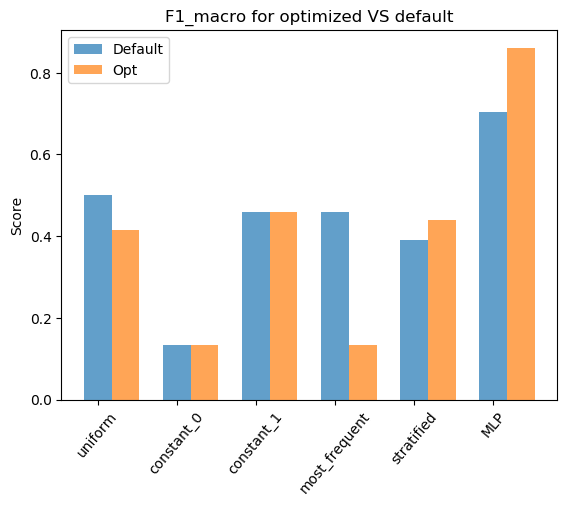

In [110]:
model_names = ["uniform" ,"constant_0","constant_1" ,"most_frequent" ,"stratified","MLP"]
y_pos = np.arange(len(model_names))
bar_width = 0.35
performancefinalmac=performancemacroopt+[macromlp_opt[2]]
plt.bar(y_pos, performancemacro,bar_width, align='center', alpha=0.7,label='Default')
plt.bar(y_pos+bar_width, performancefinalmac,bar_width, align='center', alpha=0.7,label='Opt')

plt.xticks(y_pos, model_names,rotation=50)
plt.ylabel('Score')
plt.title('F1_macro for optimized VS default')
plt.legend()
plt.show()

Εκπαίδευση MLP με βέλτιστες παραμέτρους ως προς F1-weighted

In [268]:
clf = MLPClassifier(solver=values_weighted_max[0], alpha=values_weighted_max[1],hidden_layer_sizes=values_weighted_max[2], max_iter=values_weighted_max[3], activation=values_weighted_max[4], learning_rate=values_weighted_max[5])
start_time = time.time()
clf.fit(train, train_labels)
print("Fit time : %s seconds" % (time.time() - start_time))
start_time = time.time()
predsmlp2_opt = clf.predict(test)
print("Train time: %s seconds" % (time.time() - start_time))
print classification_report(test_labels, predsmlp2_opt)
cnf_matrix = confusion_matrix(test_labels, predsmlp2_opt)
#print "----------------------------------------------------------------------"
# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
weightedmlp_opt=precision_recall_fscore_support(test_labels, predsmlp2_opt, average='weighted')
print "Precision,recall and F1 for average=weighted","\n", weightedmlp_opt, "\n"

Fit time : 0.200999975204 seconds
Train time: 0.0 seconds
             precision    recall  f1-score   support

          0       0.50      0.38      0.43         8
          1       0.85      0.90      0.88        31

avg / total       0.78      0.79      0.78        39

Precision,recall and F1 for average=weighted 
(0.77700077700077708, 0.79487179487179482, 0.78342490842490842, None) 



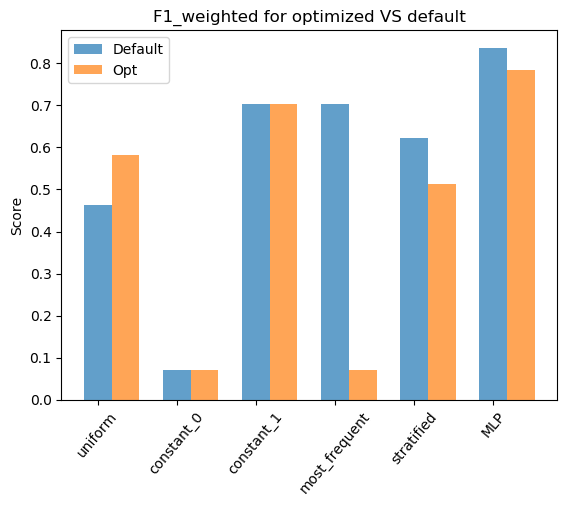

Optimal parameters are for weighted:  ['lbfgs', 0.0001, 50, 300, 'relu', 'constant']


In [269]:
model_names = ["uniform" ,"constant_0","constant_1" ,"most_frequent" ,"stratified","MLP"]
y_pos = np.arange(len(model_names))
bar_width = 0.35
performancefinalweighted=performanceweightedopt+[weightedmlp_opt[2]]
plt.bar(y_pos, performanceweighted,bar_width, align='center', alpha=0.7,label='Default')
plt.bar(y_pos+bar_width, performancefinalweighted,bar_width, align='center', alpha=0.7,label='Opt')

plt.xticks(y_pos, model_names,rotation=50)
plt.ylabel('Score')
plt.title('F1_weighted for optimized VS default')
plt.legend()
plt.show()
print "Optimal parameters are for weighted: ",values_weighted_max

Ομοίως με παραπάνω,για να μην ξανατρέχουμε το χρονοβόρο κομμάτι του κώδικα μας,δηλαδή τα εμφωλευμένα for,κρατάμε τις βέλτιστες υπερπαραμέτρους(για τη μετρικη weighted αυτή τη φορά) και εκπαιδεύουμε τον MLP με αυτές.Αυτό γιατί παρατηρήσαμε μεγάλες εναλλαγές στα score με κάθε εκπαίδευση.

In [106]:
#λαμβάνουμε τις βέλτιστες υπερπαραμέτρους από το παραπάνω μήνυμα.
clf = MLPClassifier(solver='lbfgs', alpha=0.0001,hidden_layer_sizes=50, max_iter=300, activation='relu', learning_rate='constant')
start_time = time.time()
clf.fit(train, train_labels)
print("Fit time : %s seconds" % (time.time() - start_time))
start_time = time.time()
predsmlp2_opt = clf.predict(test)
print("Train time: %s seconds" % (time.time() - start_time))
print classification_report(test_labels, predsmlp2_opt)
cnf_matrix = confusion_matrix(test_labels, predsmlp2_opt)
#print "----------------------------------------------------------------------"
# εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
weightedmlp_opt=precision_recall_fscore_support(test_labels, predsmlp2_opt, average='weighted')
print "Precision,recall and F1 for average=weighted","\n", weightedmlp_opt, "\n"

Fit time : 0.147086143494 seconds
Train time: 0.000591993331909 seconds
             precision    recall  f1-score   support

          0       0.60      1.00      0.75         6
          1       1.00      0.88      0.94        33

avg / total       0.94      0.90      0.91        39

Precision,recall and F1 for average=weighted 
(0.93846153846153846, 0.89743589743589747, 0.90694789081885852, None) 



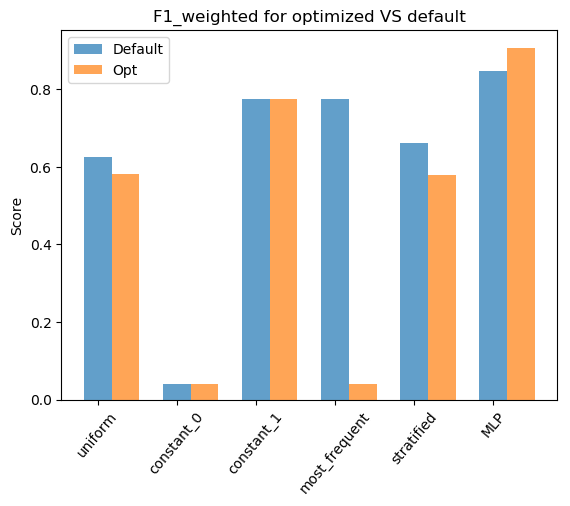

In [107]:
model_names = ["uniform" ,"constant_0","constant_1" ,"most_frequent" ,"stratified","MLP"]
y_pos = np.arange(len(model_names))
bar_width = 0.35
performancefinalweighted=performanceweightedopt+[weightedmlp_opt[2]]
plt.bar(y_pos, performanceweighted,bar_width, align='center', alpha=0.7,label='Default')
plt.bar(y_pos+bar_width, performancefinalweighted,bar_width, align='center', alpha=0.7,label='Opt')

plt.xticks(y_pos, model_names,rotation=50)
plt.ylabel('Score')
plt.title('F1_weighted for optimized VS default')
plt.legend()
plt.show()


Επομένως,παρατηρούμε ότι με επανεκπαίδευση του MLP με τις ίδιες βέλτιστες υπερπαραμέτρους, που βρήκαμε με το cross-validation, αλλάζουν τα αποτελέσματα και συγκεκριμένα,πετυχαίνουμε καλύτερη απόδοση. Ο λόγος που στις επανεκπαιδεύσεις,γράφουμε με το "χέρι" τις βέλτιστες υπερπαραμέτρους, είναι επειδή, για να έχουμε τις μεταβλητές values_weighted_max και values_macro_max, πρέπει να ξαναεκτελεστεί το cross-validation που απαιτέι αρκετές ώρες.

Σημειώνουμε σε αυτό το σημείο, ότι γενικά σε κάθε εκπαίδευση ενός classifier, η απόδοση αυξομειώνεται σημαντικά,γεγονός που μάλλον αποδίδεται στο μικρό μέγεθος του dataset.